In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
pump_target = pd.read_csv('data/Training_set_labels.csv')
pump_target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
pump_features = pd.read_csv('data/Training_set_values.csv')
pump_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
pumps = pump_features.merge(pump_target)
pumps.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
# Droping columns about when pump data was recored due to not being useful.
pumps.drop(['id', 'date_recorded', 'recorded_by'], axis=1, inplace=True)
pumps.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
# Numeric fearures from the data set.
numeric_features = []

# Boolean fearures from the data set.
boolean_features = []

# Categorical fearures from the data set.
categorical_features = []

for column in pumps.columns[:-1]:
    if type(pumps[column][0]) is np.float64 or type(pumps[column][0]) is np.int64:
        numeric_features.append(column)
    elif type(pumps[column][0]) == bool:
        boolean_features.append(column)
    elif type(pumps[column][0]) == str:
        categorical_features.append(column)

There are a few categorical columns that have many single values, so will be spliting these columns into two lists.

In [8]:
# Spliting the categorical fearure by there value counts.
categorical_features_over_100 = []
categorical_features_under_100 = []

for column in categorical_features:
    if pumps[column].value_counts()[-1] > 100:
        categorical_features_over_100.append(column)
    else:
        categorical_features_under_100.append(column)

# Simple Model (Numeric Only)

In [9]:
X = pumps[numeric_features]
y = pumps['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=pumps['status_group'])

In [10]:
tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [11]:
y_hat = tree.predict(X_test)

In [12]:
recall_score(y_test, y_hat, average='macro')

0.5776668027793255

In [13]:
numeric_feature_importances = pd.DataFrame(dict(zip(numeric_features, tree.feature_importances_)), index=[0])
numeric_feature_importances

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,0.0385,0.11593,0.335819,0.295822,0.001753,0.021718,0.033613,0.081513,0.075334


In [14]:
y_test

44614    non functional
42868        functional
24507        functional
35407    non functional
48257        functional
              ...      
47318        functional
5889     non functional
31477    non functional
4690         functional
55829    non functional
Name: status_group, Length: 14850, dtype: object

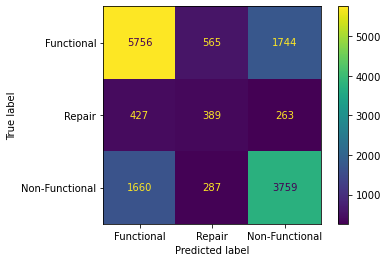

In [23]:
labels = ['Functional', 'Repair', 'Non-Functional']
plot_confusion_matrix(tree, X_test, y_test, display_labels=labels)

For the first simple model we have a score of 57.8%, and looks like gps_height, longitude and latitude did the most work.

# Simple Model (Numeric / Boolean)

Try adding in boolean featears to see if we can get better scores. But first we will need to do something about the na values.

In [14]:
pumps[boolean_features] = pumps[boolean_features].fillna(False)

In [15]:
X = pumps[numeric_features + boolean_features]
y = pumps['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=pumps['status_group'])

In [16]:
tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [17]:
y_hat = tree.predict(X_test)

In [18]:
recall_score(y_test, y_hat, average='macro')

0.5797634750330795

In [19]:
from yellowbrick.classifier import ROCAUC


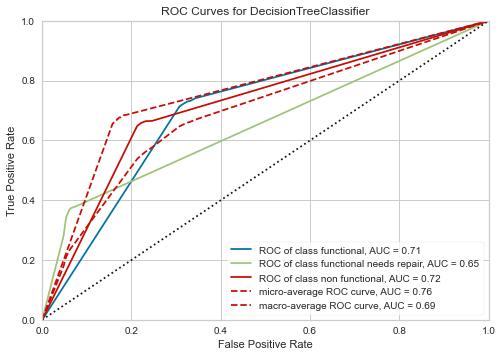

<Figure size 576x396 with 0 Axes>

In [21]:
visualizer = ROCAUC(tree)
visualizer.fit(X_test, y_test)
visualizer.score(X_test, y_test)
visualizer.show()
plt.savefig('saved_objects/fsm_ROC_AUC')

In [ ]:
asdfd

For this model we have a score of 58.0%, by adding in the boolean features. That is only an increase of 0.2% not very help full.

# Simple Model (Numeric / Categorical > 100)

In [ ]:
X = pumps[numeric_features + categorical_features_over_100]
y = pumps['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=pumps['status_group'])

In [ ]:
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_transformed = ohe.fit_transform(X_train[categorical_features_over_100])
X_train_transformed = X_train[numeric_features].join(pd.DataFrame(X_train_transformed, index=X_train.index), how='outer')

X_test_transformed = ohe.transform(X_test[categorical_features_over_100])
X_test_transformed = X_test[numeric_features].join(pd.DataFrame(X_test_transformed, index=X_test.index), how='outer')

In [ ]:
tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree.fit(X_train_transformed, y_train)

In [ ]:
y_hat = tree.predict(X_test_transformed)

In [ ]:
recall_score(y_test, y_hat, average='macro')

Awesome we got a score of 65.0% that is a nice impovement.

## Math Magic 1 (gps * longitude/latitude)

In [ ]:
pumps_magic = pumps

In [ ]:
math_magic_features = ['gps_long', 'gps_lat']

In [ ]:
pumps_magic['gps_long'] = pumps_magic['gps_height'] * pumps_magic['longitude']

pumps_magic['gps_lat'] = pumps_magic['gps_height'] * pumps_magic['latitude']

In [ ]:
X = pumps[numeric_features + categorical_features_over_100 + math_magic_features]
y = pumps['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=pumps['status_group'])

In [ ]:
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_transformed = ohe.fit_transform(X_train[categorical_features_over_100])
X_train_transformed = X_train[numeric_features + math_magic_features].join(pd.DataFrame(X_train_transformed, 
                                                                                        index=X_train.index), how='outer')

X_test_transformed = ohe.transform(X_test[categorical_features_over_100])
X_test_transformed = X_test[numeric_features + math_magic_features].join(pd.DataFrame(X_test_transformed, 
                                                                                      index=X_test.index), how='outer')

In [ ]:
tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree.fit(X_train_transformed, y_train)

In [ ]:
y_hat = tree.predict(X_test_transformed)

In [ ]:
recall_score(y_test, y_hat, average='macro')

Recall score when down some of 64.5%.

## Math Magic 2 (gps * pop)

In [ ]:
pumps_magic = pumps

In [ ]:
math_magic_features = ['gps_pop']

In [ ]:
pumps_magic['gps_pop'] = pumps_magic['gps_height'] * pumps_magic['population']

In [ ]:
X = pumps[numeric_features + categorical_features_over_100 + math_magic_features]
y = pumps['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=pumps['status_group'])

In [ ]:
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_transformed = ohe.fit_transform(X_train[categorical_features_over_100])
X_train_transformed = X_train[numeric_features + math_magic_features].join(pd.DataFrame(X_train_transformed, 
                                                                                        index=X_train.index), how='outer')

X_test_transformed = ohe.transform(X_test[categorical_features_over_100])
X_test_transformed = X_test[numeric_features + math_magic_features].join(pd.DataFrame(X_test_transformed, 
                                                                                      index=X_test.index), how='outer')

In [ ]:
tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree.fit(X_train_transformed, y_train)

In [ ]:
y_hat = tree.predict(X_test_transformed)

In [ ]:
recall_score(y_test, y_hat, average='macro')

Same as last Recall score when down some of 64.8%.

## Math Magic (Polynomial Features)

In [ ]:
X = pumps[numeric_features + categorical_features_over_100 + math_magic_features]
y = pumps['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=pumps['status_group'])

In [ ]:
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = ohe.fit_transform(X_train[categorical_features_over_100])
X_train_transformed = X_train[numeric_features].join(pd.DataFrame(X_train_ohe, index=X_train.index), how='outer')

X_test_ohe = ohe.transform(X_test[categorical_features_over_100])
X_test_transformed = X_test[numeric_features].join(pd.DataFrame(X_test_ohe, index=X_test.index), how='outer')

In [ ]:
pf = PolynomialFeatures()
X_train_pf = pf.fit_transform(X_train[numeric_features])
X_train_transformed = X_train_transformed.join(pd.DataFrame(X_train_pf, index=X_train.index), how='outer', rsuffix='pf')

X_test_pf = pf.transform(X_test[numeric_features])
X_test_transformed = X_test_transformed.join(pd.DataFrame(X_test_pf, index=X_test.index), how='outer', rsuffix='pf')

In [ ]:
tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree.fit(X_train_transformed, y_train)

In [ ]:
y_hat = tree.predict(X_test_transformed)

In [ ]:
recall_score(y_test, y_hat, average='macro')

Recall score of 64.6% no impovement.

# Forest Model (Numeric / Categorical > 100)

In [ ]:
X = pumps[numeric_features + categorical_features_over_100]
y = pumps['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=pumps['status_group'])

In [ ]:
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_transformed = ohe.fit_transform(X_train[categorical_features_over_100])
X_train_transformed = X_train[numeric_features].join(pd.DataFrame(X_train_transformed, index=X_train.index), how='outer')

X_test_transformed = ohe.transform(X_test[categorical_features_over_100])
X_test_transformed = X_test[numeric_features].join(pd.DataFrame(X_test_transformed, index=X_test.index), how='outer')

In [ ]:
tree = RandomForestClassifier(random_state=42, class_weight="balanced")
tree.fit(X_train_transformed, y_train)

In [ ]:
y_hat = tree.predict(X_test_transformed)

In [ ]:
recall_score(y_test, y_hat, average='macro')

Awesome we got a score of 67.6% that is a little impovement.

# Grid Search Forest Model (Numeric / Categorical > 100)

In [ ]:
X = pumps[numeric_features + categorical_features_over_100]
y = pumps['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=pumps['status_group'])

In [ ]:
ohe = OneHotEncoder(drop='first', sparse=False)

preprocessor = ColumnTransformer(transformers=[('categorical', ohe, categorical_features_over_100)])

In [ ]:
pipeline = Pipeline([('preprocessor', preprocessor), 
                     ('classifier', RandomForestClassifier(random_state=42, class_weight="balanced"))])

param_grid = {
 'classifier__max_depth': [3, 10, None],
 'classifier__criterion': ['gini', 'entropy'],
 'classifier__min_samples_leaf': [1, 2, 4],
 'classifier__n_estimators': [100, 500]
}

gs = GridSearchCV(pipeline, param_grid, cv=3)
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
pipeline = Pipeline([('preprocessor', preprocessor), 
                     ('classifier', RandomForestClassifier(random_state=42,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           min_samples_leaf=2,
                                                           n_estimators=100,
                                                           class_weight="balanced"))])
pipeline.fit(X_train, y_train)

In [ ]:
y_hat = pipeline.predict(X_test)

In [ ]:
recall_score(y_test, y_hat, average='macro')

Recoll score of 67.3%.